### Importing libraries

In [1]:
import seaborn as sns


from sklearn import datasets
from sklearn import manifold


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True,  as_frame=False)

pixel_values, target= data

In [3]:
targets= target.astype(int)

In [4]:
targets

array([5, 0, 4, ..., 4, 5, 6])

In [5]:
pixel_values.shape

(70000, 784)

In [6]:
single_image = pixel_values[1, :].reshape(28, 28)

In [7]:
type(single_image)

numpy.ndarray

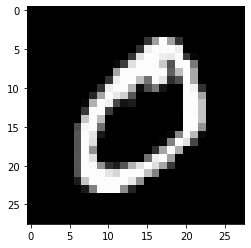

In [8]:
plt.imshow(single_image, cmap='gray')

### t-SNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


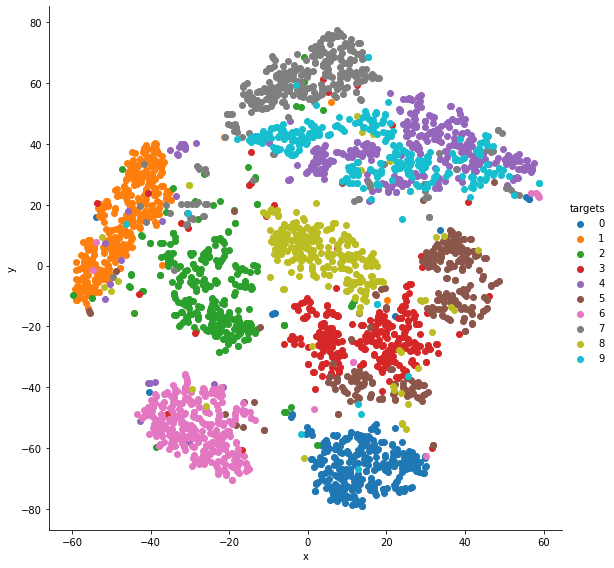

In [9]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data= tsne.fit_transform(pixel_values[:3000,:])

tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])), columns=["x","y","targets"])

tsne_df.loc[:, "targets"]= tsne_df["targets"].astype(int)

grid= sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter,"x","y").add_legend()

### PCA

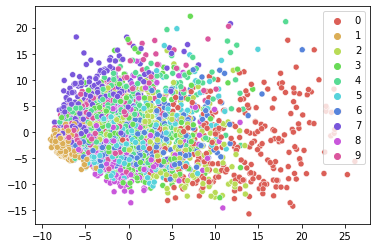

In [10]:

train = StandardScaler().fit_transform(pixel_values[:3000,:])
pca = PCA(n_components=2)
pca_res = pca.fit_transform(train)

sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue = targets[:3000], palette = sns.hls_palette(10), legend = 'full');